In [1]:
using Plots
using JLD2
using LaTeXStrings
using StatsBase

In [2]:
saved_data = jldopen("25_07_16_small_fig_5_data.jld2")["data3"]

Dict{Tuple{Int64, Int64, Float64, Float64, Float64}, Tuple{Int64, Dict}} with 27 entries:
  (4, 8, -0.25, 0.7, 0.1)   => (250, Dict(:κEA=>[4.0, 4.0, 1.02572, 2.34802, 1.…
  (4, 8, 0.25, 0.7, 0.1)    => (250, Dict(:κEA=>[4.0, 4.0, 1.00319, 1.62745, 1.…
  (12, 24, 0.0, 0.7, 0.1)   => (250, Dict(:κEA=>[12.0, 12.0, 1.03375, 3.33825, …
  (12, 24, -0.75, 0.7, 0.1) => (250, Dict(:κEA=>[12.0, 12.0, 1.69178, 8.10606, …
  (8, 16, 1.0, 0.7, 0.1)    => (250, Dict(:κEA=>[8.0, 8.0, 1.00022, 1.00022, 1.…
  (4, 8, -1.0, 0.7, 0.1)    => (250, Dict(:κEA=>[4.0, 4.0, 1.50332, 3.37775, 1.…
  (12, 24, 0.75, 0.7, 0.1)  => (250, Dict(:κEA=>[12.0, 12.0, 1.00121, 1.13274, …
  (8, 16, -0.5, 0.7, 0.1)   => (250, Dict(:κEA=>[8.0, 8.0, 1.1638, 4.806, 1.097…
  (4, 8, 1.0, 0.7, 0.1)     => (250, Dict(:κEA=>[4.0, 4.0, 1.00009, 1.00009, 1.…
  (8, 16, 0.5, 0.7, 0.1)    => (250, Dict(:κEA=>[8.0, 8.0, 1.00246, 1.41622, 1.…
  (4, 8, -0.5, 0.7, 0.1)    => (250, Dict(:κEA=>[4.0, 4.0, 1.0702, 2.79142, 1.0…
  (8, 16, 0.0, 0.7,

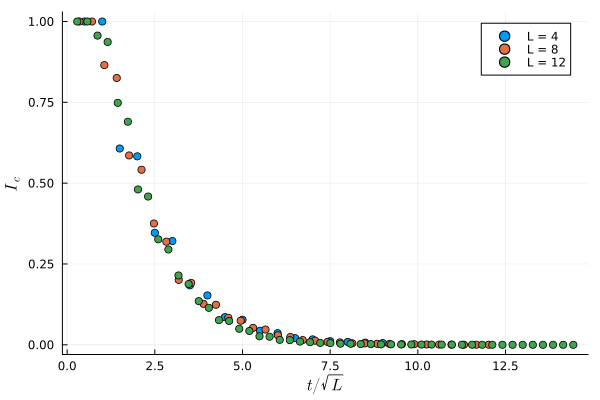

In [67]:
plt = plot()
Δ = 0.0
δ = 0.7
q = 0.1
for L in 4:4:12
    data = saved_data[(L, 2L, Δ, δ, q)]
    xs = 1:1:length(data[2][:Ic])
    ys = [data[2][:Ic][i] for i in xs]
    plot!(plt, collect(xs)/L^(0.5), ys, seriestype=:scatter, label="L = $L", markersize=4)
end
plot!(plt, xlabel=L"t/\sqrt{L}", ylabel=L"I_c", legend=:topright)
plt

In [19]:
blur(xs, step) = mean([xs[i:step:end] for i in 1:step])

blur (generic function with 1 method)

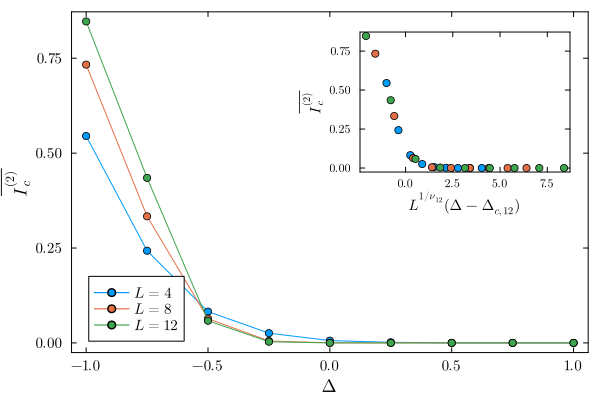

In [146]:
q = 0.1
δ = 0.7
plt = plot()
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:Ic],2)[end] for Δ in Δs]
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, legend=:bottomleft,
    grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
p1 = plt
p1

plot(p1)

plot!(p1,inset=bbox(0.6,0.08,0.35,0.35), subplot=2, )

ν = 1.5
Δc = -0.6
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    xs = (Δs .- Δc) * L^(1/ν)
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:Ic],2)[end] for Δ in Δs]
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (0.0:2.5:7.5, [L"0.0", L"2.5", L"5.0", L"7.5"])
    yticks = (0.0:0.25:0.75, [L"0.00", L"0.25", L"0.50", L"0.75"])#, L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{12}}(\Delta-\Delta_{c,12})", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks,
    subplot=2, grid=false, legend=false,
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
# # annotate!(11.5, 0.9, text(L"(\nu_2=1.0)", 10, :center), subplot=2)
savefig("/Users/jhauser/Documents/Z2 paper figs/updated/Ic_2.pdf")
p1

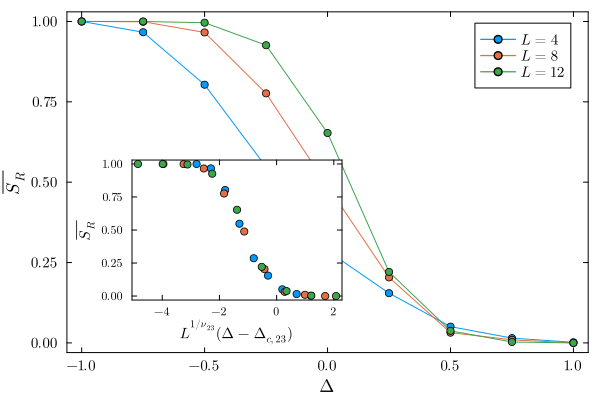

In [147]:
q = 0.1
δ = 0.7
plt = plot()
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, legend=:topright,
    grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
p1 = plt
p1

plot(p1)

plot!(p1,inset=bbox(0.22,0.4,0.35,0.35), subplot=2, )

ν = 2.
Δc = 0.4
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    xs = (Δs .- Δc) * L^(1/ν)
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-4:2:2, [L"-4", L"-2", L"0", L"2"])
    yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{23}}(\Delta-\Delta_{c,23})", ylabel=L"\overline{S_R}", # title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks,
    subplot=2, grid=false, legend=false,
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
# # annotate!(11.5, 0.9, text(L"(\nu_2=1.0)", 10, :center), subplot=2)
savefig("/Users/jhauser/Documents/Z2 paper figs/updated/SR.pdf")
p1

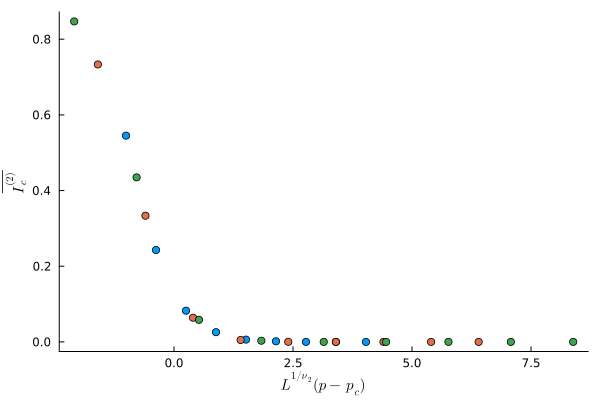

In [ ]:
ν = 1.5
Δc = -0.6
plt = plot()
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    xs = (Δs .- Δc) * L^(1/ν)
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:Ic],2)[end] for Δ in Δs]
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    # xticks = (-5:5:15, [L"-5", L"0", L"5", L"10", L"15"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{2}}(p-p_c)", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
#     framestyle=:box, xticks=xticks, yticks=yticks,
    grid=false, legend=false,
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
plt

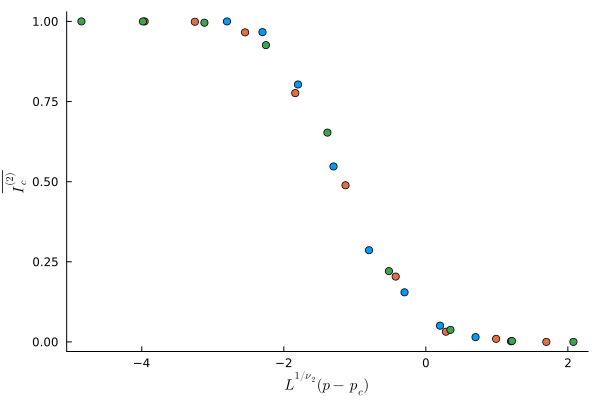

In [131]:
ν = 2.
Δc = 0.4
plt = plot()
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    xs = (Δs .- Δc) * L^(1/ν)
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:SR],2)[end] for Δ in Δs]
#     # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    # xticks = (-5:5:15, [L"-5", L"0", L"5", L"10", L"15"])
    # yticks = (0.0:0.25:1.0, [L"0.00", L"0.25", L"0.50", L"0.75", L"1.00"])
    plot!(plt, xs, ys, seriestype=:scatter, m=4, label=L"L=%$L", xlabel=L"L^{1/\nu_{2}}(p-p_c)", ylabel=L"\overline{I_c^{(2)}}", # title="r=$r",
#     framestyle=:box, xticks=xticks, yticks=yticks,
    grid=false, legend=false,
    xtickfontsize=8,ytickfontsize=8, xguidefontsize=10, yguidefontsize=10, legendfontsize=8, titlefontsize=14)
end
plt

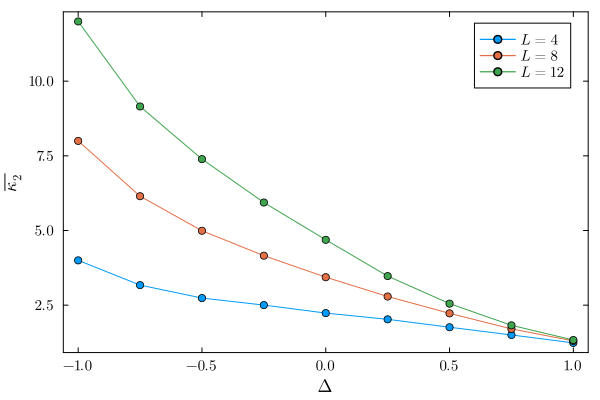

In [161]:

q = 0.1
plt = plot()
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:κ2],2)[end] for Δ in Δs]
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (2.5:2.5:10.0, [L"2.5", L"5.0", L"7.5", L"10.0"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_2}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappa2.pdf")
plt

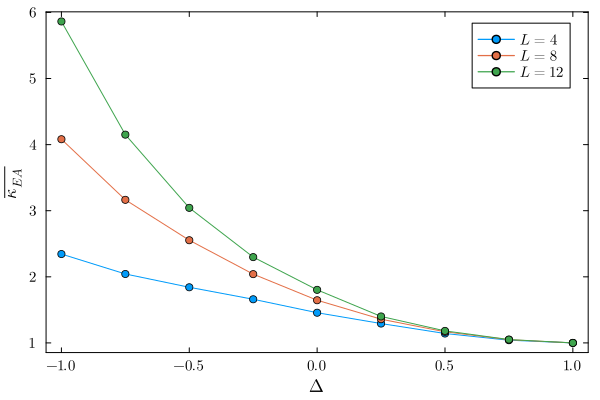

In [160]:

q = 0.1
plt = plot()
for L in 4:4:12
    Δs = -1.0:0.25:1.0
    ys = [blur(saved_data[(L,2L,Δ,δ,q)][2][:κEA],2)[end] for Δ in Δs]
    # plot!(plt, qs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"q", ylabel=L"\frac{1}{L} \sum_{i,j}\langle\langle Z_i Z_j Z'_i Z'_j\rangle\rangle", title="r=$r")
    xticks = (-1.0:0.5:1.0, [L"-1.0", L"-0.5", L"0.0", L"0.5", L"1.0"])
    yticks = (1:1:6, [L"1", L"2", L"3", L"4", L"5", L"6"])
    plot!(plt, Δs, ys, seriestype=:line, m=4, label=L"L=%$L", xlabel=L"\Delta", ylabel=L"\overline{\kappa_{EA}}", #title="r=$r",
    framestyle=:box, xticks=xticks, yticks=yticks, grid=false,
    xtickfontsize=10,ytickfontsize=10, xguidefontsize=12, yguidefontsize=12, legendfontsize=10, titlefontsize=16)
end
savefig("/Users/jhauser/Documents/Z2 paper figs/updated/kappaEA.pdf")
plt